In [1]:
# подгружаем все нужные пакеты
import pandas as pd
import numpy as np

# игнорируем warnings
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

# настройка внешнего вида графиков в seaborn
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (18, 12), 
        "axes.titlesize" : 18 
    }
)

In [2]:
train = pd.read_csv('mlbootcamp5_train.csv', sep=';',
                    index_col='id')

In [3]:
print('Размер датасета: ', train.shape)
train.head()

Размер датасета:  (70000, 12)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
train_uniques = pd.melt(frame=train, value_vars=['gender','cholesterol', 
                                                 'gluc', 'smoke', 'alco', 
                                                 'active', 'cardio'])

In [5]:
train_uniques

,variable,value
0,gender,2
1,gender,1
2,gender,1
3,gender,2
4,gender,1
5,gender,1
6,gender,1
7,gender,2
8,gender,1
9,gender,1


In [5]:
train_uniques = pd.DataFrame(train_uniques.groupby(['variable', 
                                                    'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

In [6]:
train_uniques

,variable,value,count
0,active,0,13739
1,active,1,56261
2,alco,0,66236
3,alco,1,3764
4,cardio,0,35021
5,cardio,1,34979
6,cholesterol,1,52385
7,cholesterol,2,9549
8,cholesterol,3,8066
9,gender,1,45530


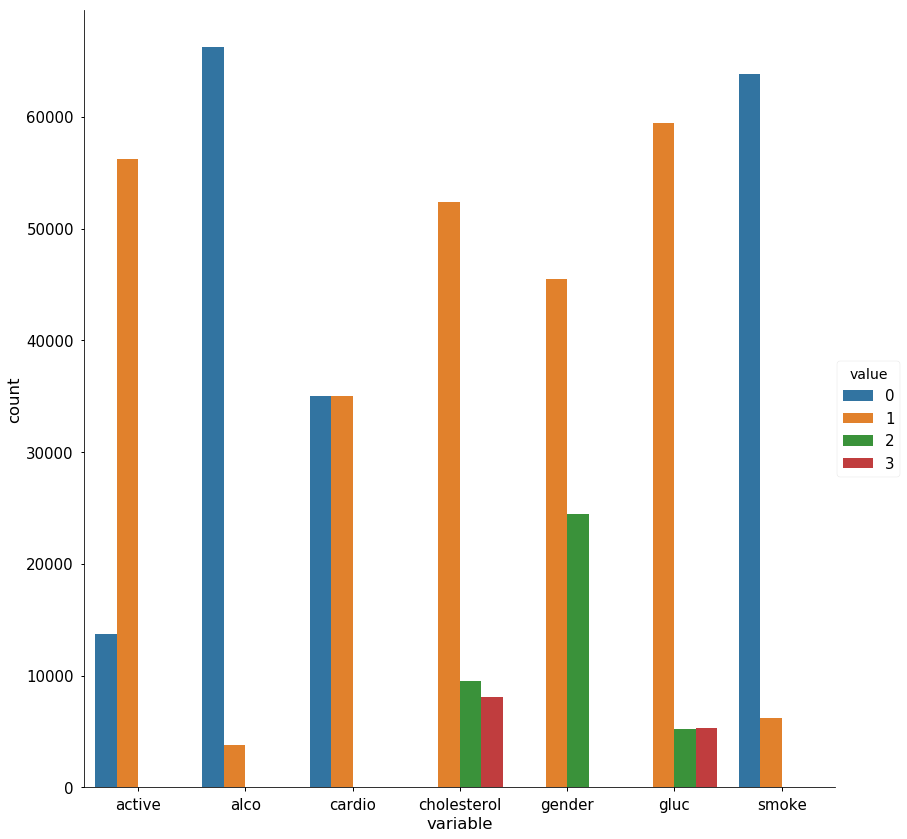

In [7]:
sns.factorplot(x='variable', y='count', hue='value', 
               data=train_uniques, kind='bar', size=12);

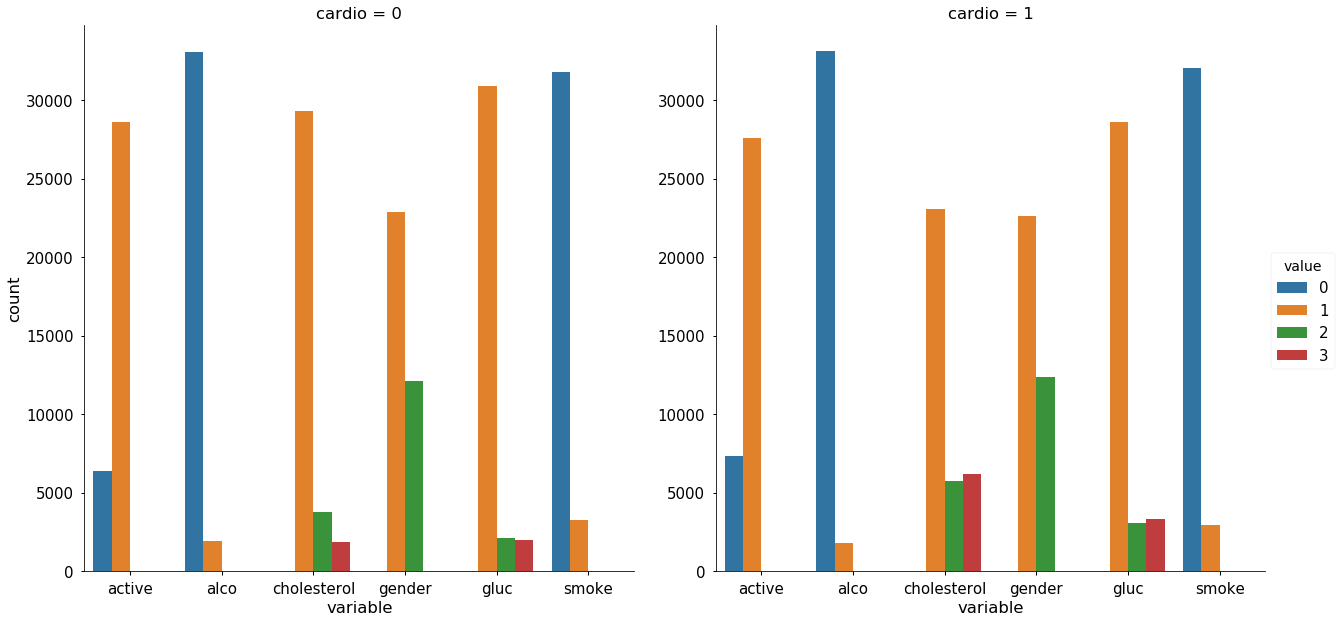

In [8]:
train_uniques = pd.melt(frame=train, value_vars=['gender','cholesterol', 
                                                 'gluc', 'smoke', 'alco', 
                                                 'active'], 
                        id_vars=['cardio'])
train_uniques = pd.DataFrame(train_uniques.groupby(['variable', 'value', 
                                                    'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', 
               col='cardio', data=train_uniques, kind='bar', size=9);

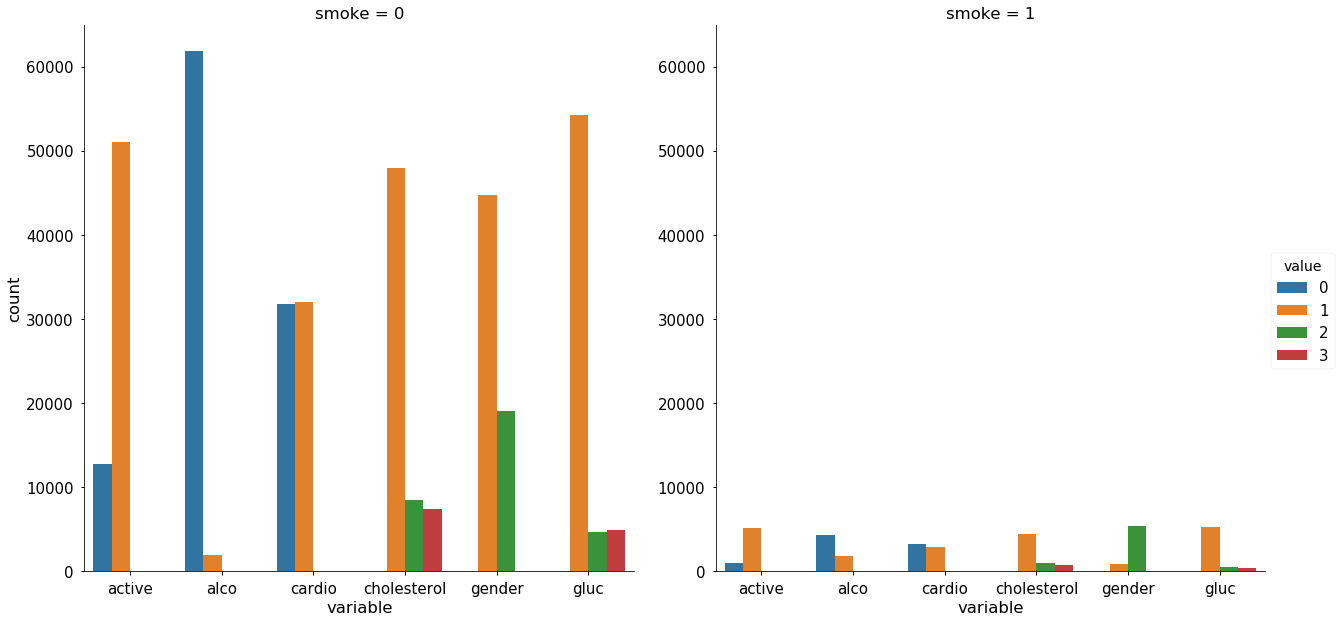

In [9]:
train_uniques = pd.melt(frame=train, value_vars=['gender','cholesterol', 
                                                 'gluc', 'cardio', 'alco', 
                                                 'active'], 
                        id_vars=['smoke'])
train_uniques = pd.DataFrame(train_uniques.groupby(['variable', 'value', 
                                                    'smoke'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', 
               col='smoke', data=train_uniques, kind='bar', size=9);

In [10]:
for c in train.columns:
    n = train[c].nunique()
    print('c = ',c)
    
    if n <= 3:
        print(n, sorted(train[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

c =  age
8076
----------
c =  gender
2 [(1, 45530), (2, 24470)]
----------
c =  height
109
----------
c =  weight
287
----------
c =  ap_hi
153
----------
c =  ap_lo
157
----------
c =  cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
c =  gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
c =  smoke
2 [(0, 63831), (1, 6169)]
----------
c =  alco
2 [(0, 66236), (1, 3764)]
----------
c =  active
2 [(0, 13739), (1, 56261)]
----------
c =  cardio
2 [(0, 35021), (1, 34979)]
----------


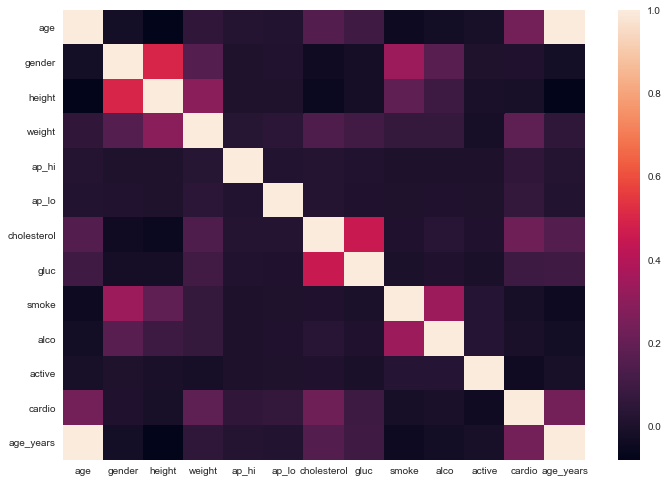

In [44]:
sns.heatmap(train.corr());

In [12]:
train.corr(method='pearson')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


### 1
Gluc, Cholesterol

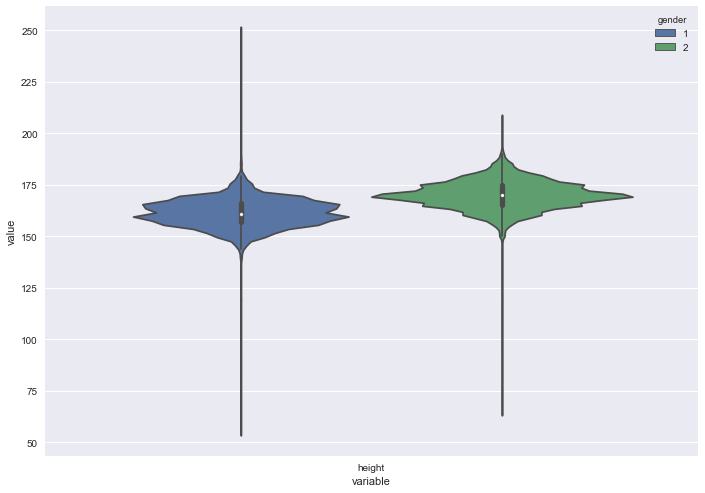

In [42]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
df = pd.melt(train, value_vars=['height'], id_vars='gender')
sns.violinplot(x='variable', y='value', hue='gender', data=df)

plt.show()

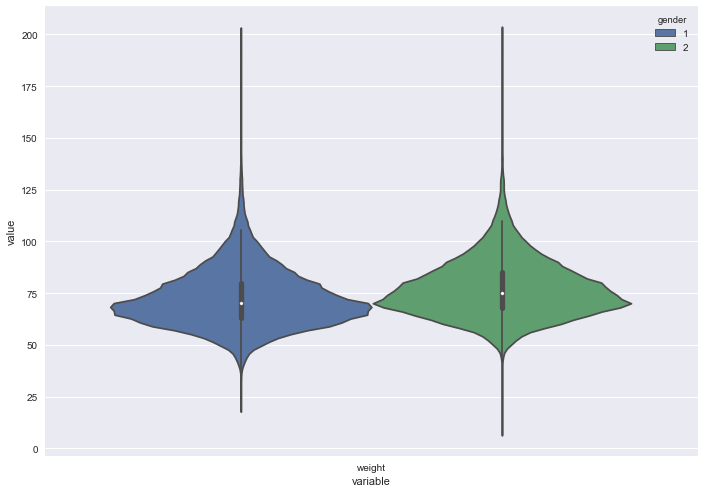

In [43]:
df = pd.melt(train, value_vars=['weight'], id_vars='gender')
sns.violinplot(x='variable', y='value', hue='gender', data=df)
plt.figure(figsize=(20,15))
plt.show()

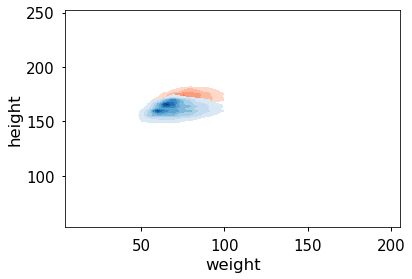

In [15]:
>>> men = train.loc[train.gender == 2]
>>> women = train.loc[train.gender ==1]
>>> ax = sns.kdeplot(men.weight, men.height,
...                  cmap="Reds", shade=True, shade_lowest=False)
>>> ax = sns.kdeplot(women.weight, women.height,
...                  cmap="Blues", shade=True, shade_lowest=False)

In [16]:
train.corr(method='spearman')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.020176,-0.082292,0.061559,0.219087,0.156700,0.140113,0.091791,-0.047471,-0.030078,-0.010422,0.234429
gender,-0.020176,1.000000,0.533805,0.172480,0.063174,0.066374,-0.035730,-0.018866,0.338135,0.170966,0.005866,0.008109
height,-0.082292,0.533805,1.000000,0.313569,0.019381,0.030534,-0.058940,-0.024369,0.197632,0.096670,-0.007367,-0.012383
weight,0.061559,0.172480,0.313569,1.000000,0.277749,0.254420,0.137908,0.109901,0.071676,0.068088,-0.014894,0.182701
ap_hi,0.219087,0.063174,0.019381,0.277749,1.000000,0.735436,0.208722,0.105334,0.028929,0.033243,-0.001268,0.451885
ap_lo,0.156700,0.066374,0.030534,0.254420,0.735436,1.000000,0.167401,0.082474,0.026172,0.038862,0.003401,0.362572
cholesterol,0.140113,-0.035730,-0.058940,0.137908,0.208722,0.167401,1.000000,0.407803,0.015220,0.041285,0.007573,0.215117
gluc,0.091791,-0.018866,-0.024369,0.109901,0.105334,0.082474,0.407803,1.000000,0.000468,0.018584,-0.008610,0.091488
smoke,-0.047471,0.338135,0.197632,0.071676,0.028929,0.026172,0.015220,0.000468,1.000000,0.340094,0.025858,-0.015486
alco,-0.030078,0.170966,0.096670,0.068088,0.033243,0.038862,0.041285,0.018584,0.340094,1.000000,0.025476,-0.007330


### Height, Weight - 0.313569
### Age, Weight - 0.061559
### Ap_hi, Ap_lo - 0.735436
### Cholesterol, Gluc - 0.407803
### Cardio, Cholesterol - 0.215117
### Smoke, Alco - 0.340094

In [17]:
train.corr(method='spearman').replace(1.0, 0).max()


age            0.234429
gender         0.533805
height         0.533805
weight         0.313569
ap_hi          0.735436
ap_lo          0.735436
cholesterol    0.407803
gluc           0.407803
smoke          0.340094
alco           0.340094
active         0.025858
cardio         0.451885
dtype: float64

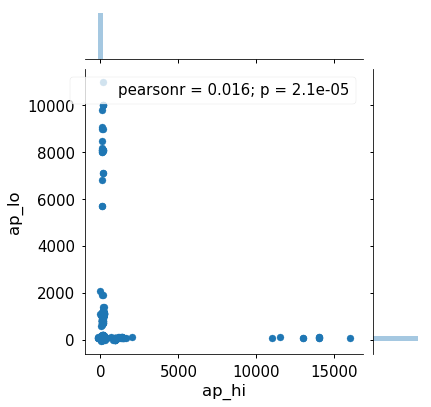

In [18]:
>>> g = sns.jointplot(x="ap_hi", y="ap_lo", data=train)


In [20]:
zf = train[['ap_hi', 'ap_lo']]

In [28]:
zf['ap_hi'] = np.log(zf['ap_hi'])
zf['ap_lo'] = np.log(zf['ap_lo'])

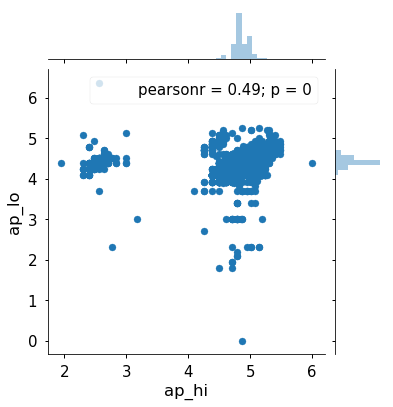

In [29]:
g = sns.jointplot(x="ap_hi", y="ap_lo", data=zf)

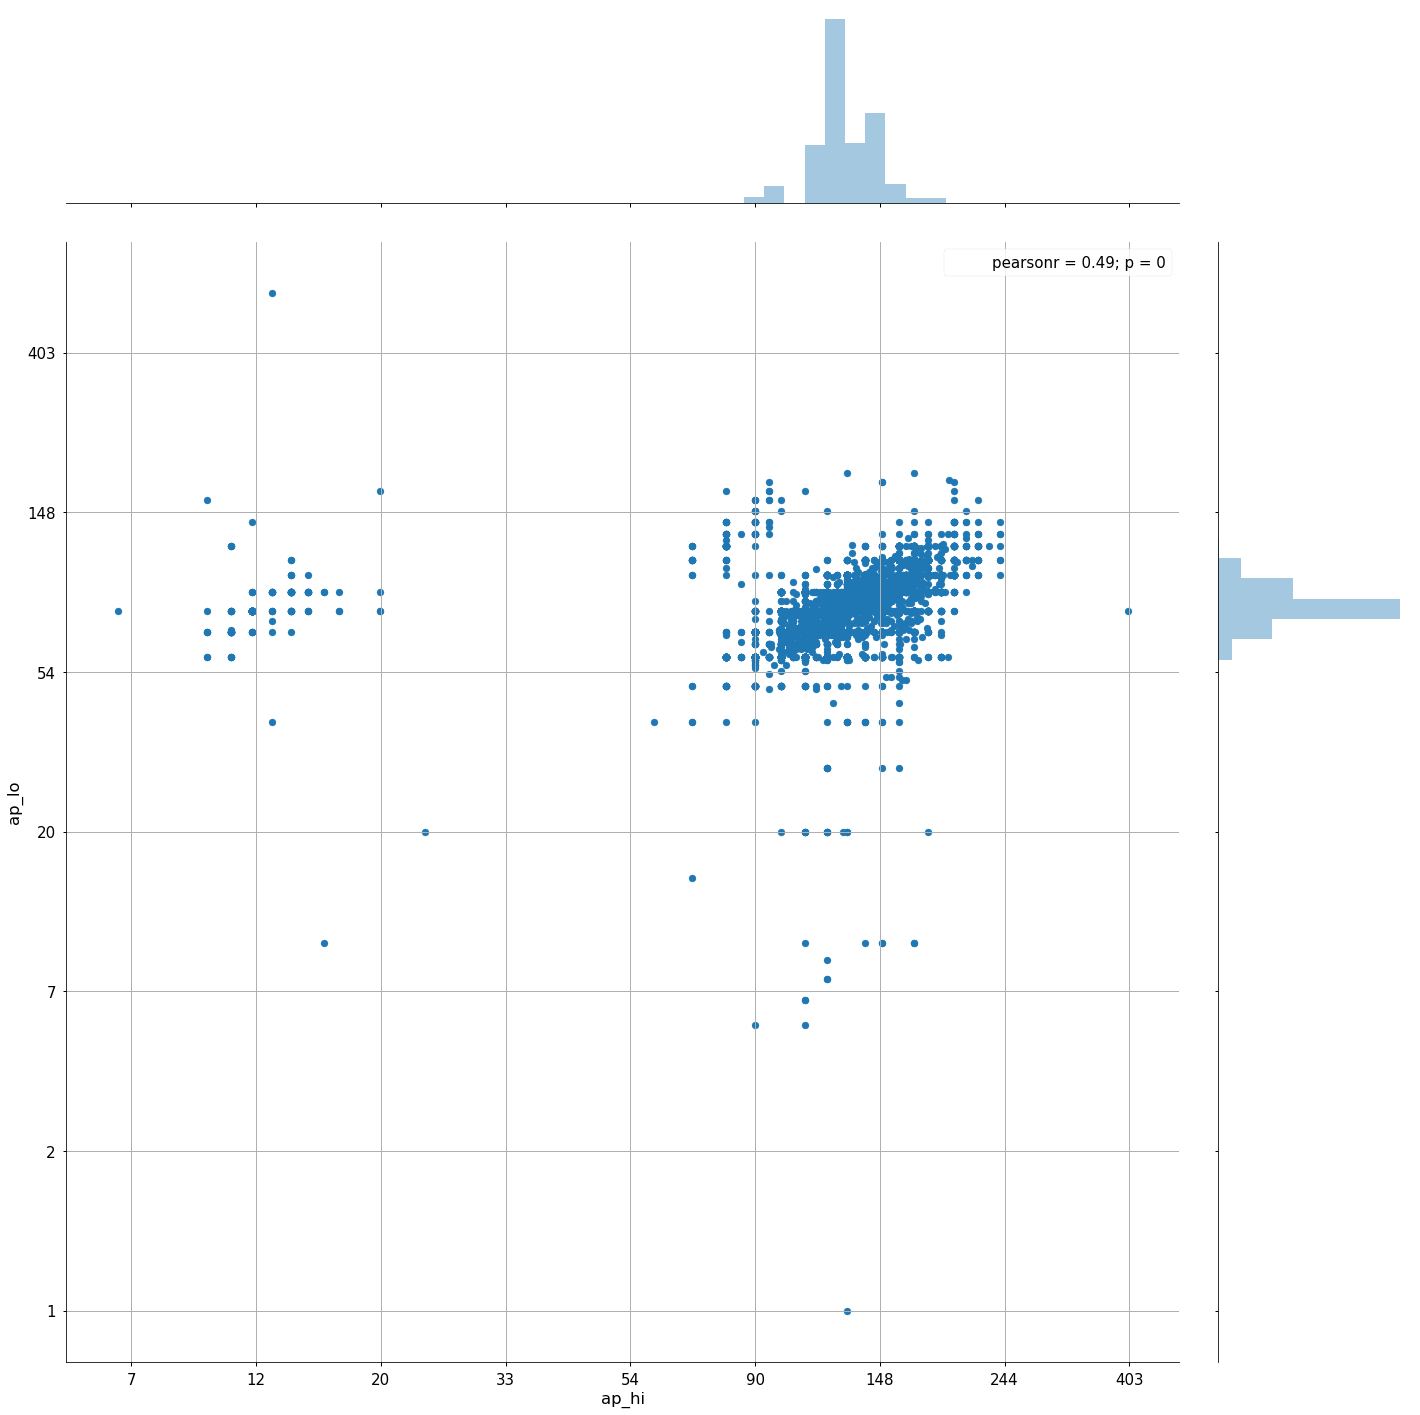

In [40]:
g = sns.jointplot(x="ap_hi", y="ap_lo", data=zf, size=20)
"""Сетка"""
g.ax_joint.grid(True) 

"""Преобразуем логарифмические значения на шкалах в реальные"""

g.ax_joint.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))
g.ax_joint.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))
# show()

In [26]:
zf = train[['ap_hi', 'ap_lo']]

In [27]:
zf['ap_hi'] = zf.ap_hi.apply(lambda x: np.nan if x <= 0 or x >= 600 else x)
zf['ap_lo'] = zf.ap_lo.apply(lambda x: np.nan if x <= 0 or x >= 600 else x)

In [108]:
zf.dropna().describe()

,ap_hi,ap_lo
count,68836.000000,68836.000000
mean,126.151723,81.281699
std,17.313948,9.673438
min,7.000000,1.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
max,197.000000,190.000000


In [110]:
zf = zf.dropna()

In [111]:
for i in zf['ap_hi']:
    try:
        str(round(int(np.exp(i))))
    except:
        print(i)
    

In [33]:
train['age_years'] = (train['age'] // 365.25).astype(int)


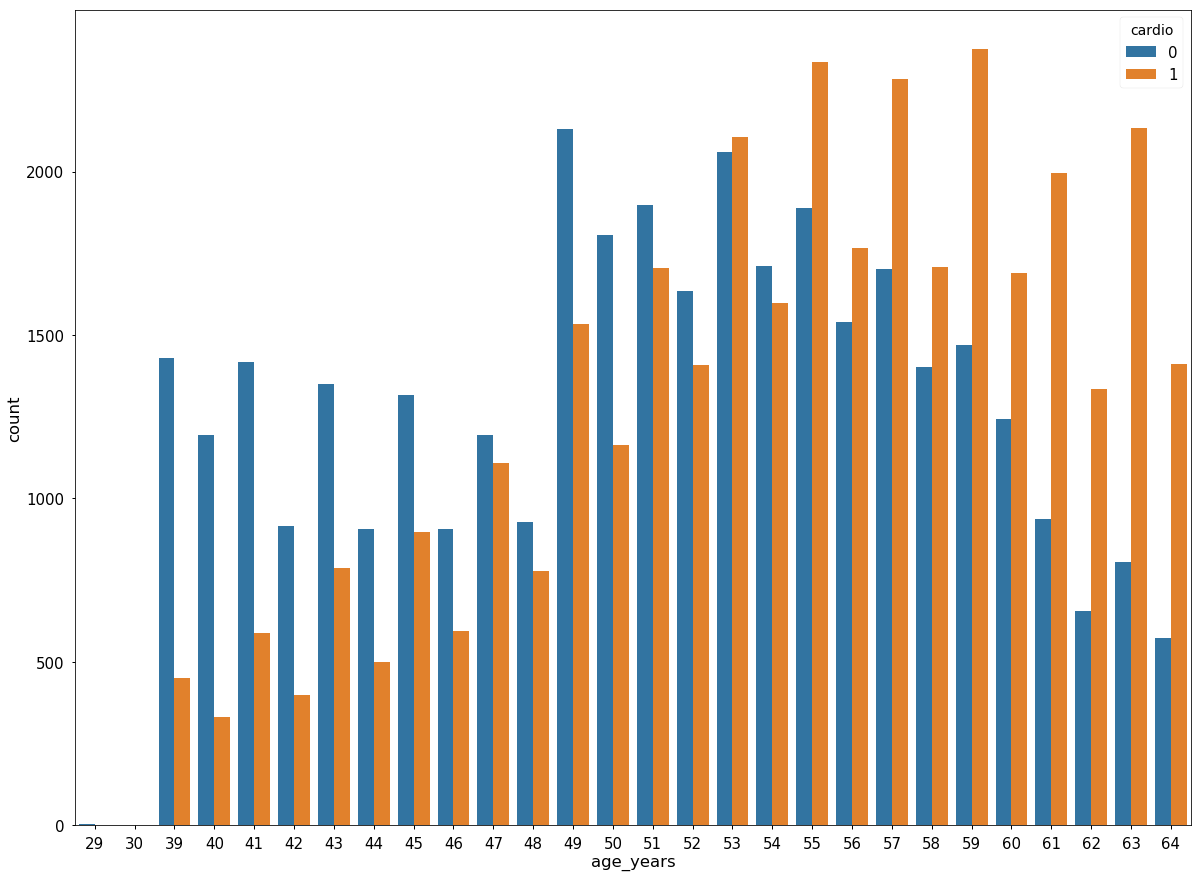

In [41]:
plt.figure(figsize=(20,15))
ax = sns.countplot(x="age_years",hue="cardio", data=train)